Mean Squared Error on Original Data: 0.8066
Mean Squared Error on Drifted Data: 1.2482

Comparison of Errors:
Original MSE: 0.8066
Drifted MSE: 1.2482
The MSE on the drifted data is significantly higher, indicating a drop in model performance.


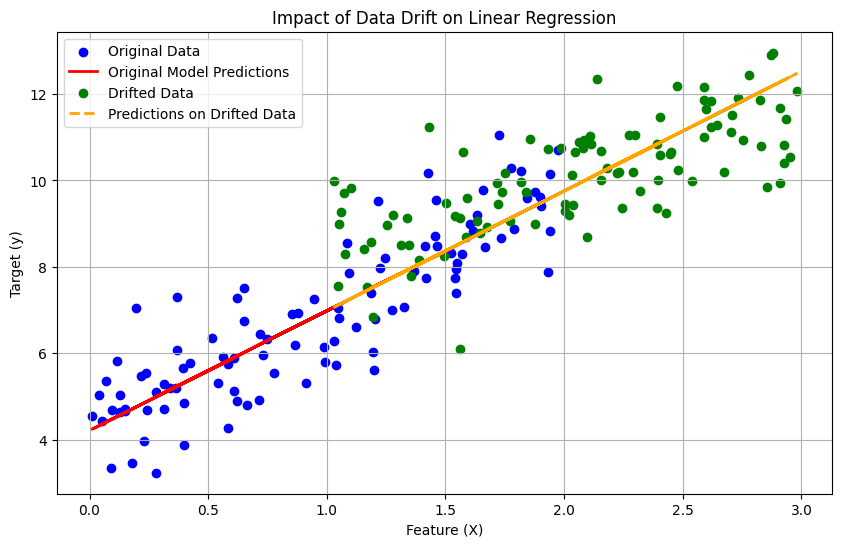

In [1]:
# Data Drift Impact on Model
# Question: Use a simple linear regression model to demonstrate how data drift affects model predictions.

# 1. Train a model on the original data:
# 2. Evaluate on the drifted data:
# 3. Compare errors:


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate Original Data
np.random.seed(42)
X_original = 2 * np.random.rand(100, 1)
y_original = 4 + 3 * X_original + np.random.randn(100, 1)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_original, y_original)

# Make predictions on the original data
y_original_pred = model.predict(X_original)
original_mse = mean_squared_error(y_original, y_original_pred)
print(f"Mean Squared Error on Original Data: {original_mse:.4f}")

# 2. Generate Drifted Data
# Let's introduce drift in the input feature (X) and the relationship with the target (y)
X_drifted = 2 * np.random.rand(100, 1) + 1  # Shift the input feature
y_drifted = 7 + 1.5 * X_drifted + np.random.randn(100, 1) # Change the intercept and coefficient

# Make predictions on the drifted data using the original model
y_drifted_pred = model.predict(X_drifted)
drifted_mse = mean_squared_error(y_drifted, y_drifted_pred)
print(f"Mean Squared Error on Drifted Data: {drifted_mse:.4f}")

# 3. Compare Errors and Visualize
print(f"\nComparison of Errors:")
print(f"Original MSE: {original_mse:.4f}")
print(f"Drifted MSE: {drifted_mse:.4f}")
print(f"The MSE on the drifted data is significantly higher, indicating a drop in model performance.")

plt.figure(figsize=(10, 6))
plt.scatter(X_original, y_original, color='blue', label='Original Data')
plt.plot(X_original, y_original_pred, color='red', linewidth=2, label='Original Model Predictions')
plt.scatter(X_drifted, y_drifted, color='green', label='Drifted Data')
plt.plot(X_drifted, y_drifted_pred, color='orange', linewidth=2, linestyle='--', label='Predictions on Drifted Data')
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Impact of Data Drift on Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np

# Assume we have the original and drifted datasets (as created in the previous example)
np.random.seed(42)
X_original = 2 * np.random.rand(100, 1)
y_original = 4 + 3 * X_original + np.random.randn(100, 1)

X_drifted = 2 * np.random.rand(100, 1) + 1
y_drifted = 7 + 1.5 * X_drifted + np.random.randn(100, 1)

# 1. Calculate Feature Statistics
def calculate_feature_stats(data):
    """Calculates the mean and standard deviation of each feature in the data."""
    stats = {}
    for i in range(data.shape[1]):
        feature = data[:, i]
        stats[f'feature_{i}'] = {
            'mean': np.mean(feature),
            'std': np.std(feature)
        }
    return stats

original_stats_X = calculate_feature_stats(X_original)
drifted_stats_X = calculate_feature_stats(X_drifted)

print("Original Data Feature Statistics (X):")
print(original_stats_X)
print("\nDrifted Data Feature Statistics (X):")
print(drifted_stats_X)

# 2. Compare Statistics
def compare_feature_stats(original_stats, current_stats, threshold_multiplier=2):
    """Compares the statistics of original and current data against a threshold."""
    drift_detected = {}
    for feature, original in original_stats.items():
        current = current_stats.get(feature)
        if current:
            mean_diff = np.abs(original['mean'] - current['mean'])
            std_diff = np.abs(original['std'] - current['std'])

            # 3. Set Thresholds (based on standard deviation of the original data)
            mean_threshold = threshold_multiplier * original['std']
            std_threshold = threshold_multiplier * original['std'] # Using the same multiplier for simplicity

            mean_drift = mean_diff > mean_threshold
            std_drift = std_diff > std_threshold

            drift_detected[feature] = {
                'mean_difference': mean_diff,
                'std_difference': std_diff,
                'mean_drift': mean_drift,
                'std_drift': std_drift,
                'mean_threshold': mean_threshold,
                'std_threshold': std_threshold
            }
        else:
            drift_detected[feature] = "Feature not found in current data"
    return drift_detected

drift_report_X = compare_feature_stats(original_stats_X, drifted_stats_X)
print("\nDrift Detection Report for Feature (X):")
for feature, report in drift_report_X.items():
    print(f"Feature: {feature}")
    if isinstance(report, dict):
        print(f"  Mean Difference: {report['mean_difference']:.4f} (Threshold: {report['mean_threshold']:.4f}) - Drift: {report['mean_drift']}")
        print(f"  Std Difference: {report['std_difference']:.4f} (Threshold: {report['std_threshold']:.4f}) - Drift: {report['std_drift']}")
    else:
        print(f"  {report}")

Original Data Feature Statistics (X):
{'feature_0': {'mean': np.float64(0.9403614867564187), 'std': np.float64(0.5919964532649807)}}

Drifted Data Feature Statistics (X):
{'feature_0': {'mean': np.float64(2.0565845428810237), 'std': np.float64(0.5725067549445346)}}

Drift Detection Report for Feature (X):
Feature: feature_0
  Mean Difference: 1.1162 (Threshold: 1.1840) - Drift: False
  Std Difference: 0.0195 (Threshold: 1.1840) - Drift: False


In [3]:
import pandas as pd
import numpy as np

# Sample Dataset (you would load your actual data here)
data = {
    'user_id': [1, 2, 3, 4, 5],
    'age': [25, 30, None, 22, 40],
    'city': ['Bangalore', 'Mumbai', 'Delhi', 'Bangalore', 'Chennai'],
    'signup_date': ['2023-01-15', '2023-02-20', '2023-01-10', '2023-03-01', '2023-02-15'],
    'purchase_amount': [100.50, 200.0, -50.0, 75.25, 150.75]
}
df = pd.DataFrame(data)

# 1. Define Validation Checks
validation_checks = {
    'user_id': {'dtype': int, 'is_unique': True, 'not_null': True},
    'age': {'dtype': float, 'min': 18, 'max': 65},
    'city': {'dtype': str, 'allowed_values': ['Bangalore', 'Mumbai', 'Delhi', 'Chennai', 'Kolkata']},
    'signup_date': {'dtype': 'datetime', 'format': '%Y-%m-%d'},
    'purchase_amount': {'dtype': float, 'min': 0}
}

# 2. Apply Validation
def validate_data(df, checks):
    """Applies a series of validation checks to a Pandas DataFrame."""
    validation_errors = {}
    for column, rules in checks.items():
        errors = []
        series = df[column]

        # Check for Not Null
        if rules.get('not_null', False):
            if series.isnull().any():
                errors.append(f"Null values found in column '{column}'.")

        # Check Data Type
        expected_dtype = rules.get('dtype')
        if expected_dtype:
            actual_dtype = series.dtype
            if expected_dtype == 'datetime':
                try:
                    pd.to_datetime(series, format=rules.get('format'), errors='raise')
                except ValueError as e:
                    errors.append(f"Data type mismatch in column '{column}'. Expected datetime (format: {rules.get('format')}), got {actual_dtype}.")
            elif not pd.api.types.is_dtype_equal(actual_dtype, expected_dtype):
                errors.append(f"Data type mismatch in column '{column}'. Expected {expected_dtype}, got {actual_dtype}.")

        # Check for Uniqueness
        if rules.get('is_unique', False):
            if not series.is_unique:
                errors.append(f"Non-unique values found in column '{column}'.")

        # Check Minimum Value
        min_val = rules.get('min')
        if min_val is not None:
            if pd.api.types.is_numeric_dtype(series):
                if (series < min_val).any():
                    errors.append(f"Values below the minimum of {min_val} found in column '{column}'.")

        # Check Maximum Value
        max_val = rules.get('max')
        if max_val is not None:
            if pd.api.types.is_numeric_dtype(series):
                if (series > max_val).any():
                    errors.append(f"Values above the maximum of {max_val} found in column '{column}'.")

        # Check Allowed Values
        allowed_values = rules.get('allowed_values')
        if allowed_values:
            if not series.isin(allowed_values).all():
                invalid_values = series[~series.isin(allowed_values)].unique()
                errors.append(f"Invalid values found in column '{column}': {invalid_values}.")

        if errors:
            validation_errors[column] = errors

    return validation_errors

# Apply the validation checks
validation_report = validate_data(df.copy(), validation_checks) # Use a copy to avoid modifying the original DataFrame

# Print the validation report
if validation_report:
    print("Data Validation Report:")
    for column, errors in validation_report.items():
        print(f"\nColumn: {column}")
        for error in errors:
            print(f"- {error}")
else:
    print("All validation checks passed!")

Data Validation Report:

Column: city
- Data type mismatch in column 'city'. Expected <class 'str'>, got object.

Column: purchase_amount
- Values below the minimum of 0 found in column 'purchase_amount'.


In [7]:
import great_expectations as gx
import pandas as pd

# Initialize DataContext
context = gx.get_context()

expectation_suite_name = "my_data_validation_suite"

try:
    suite = context.suites.get(expectation_suite_name)
    print(f"Expectation Suite '{expectation_suite_name}' already exists.")
except KeyError:
    suite = context.suites.add(
        expectation_suite_name=expectation_suite_name,
        overwrite_existing=True
    )
    print(f"Created Expectation Suite '{expectation_suite_name}'.")

# Load Data and Generate Expectations
data = {
    'user_id': [1, 2, 3, 4, 5],
    'age': [25, 30, None, 22, 40],
    'city': ['Bangalore', 'Mumbai', 'Delhi', 'Bangalore', 'Chennai'],
    'signup_date': ['2023-01-15', '2023-02-20', '2023-01-10', '2023-03-01', '2023-02-15'],
    'purchase_amount': [100.50, 200.0, -50.0, 75.25, 150.75]
}
df = pd.DataFrame(data)

# Create a Great Expectations Data Source and Batch
datasource_name = "pandas_source"
pandas_data_asset_name = "my_pandas_data"

try:
    context.get_datasource(datasource_name)
    print(f"Datasource '{datasource_name}' already exists.")
except gx.exceptions.DatasourceNotFoundError:
    datasource = context.add_pandas(name=datasource_name, batch_kwargs={"dataframe": df})
    print(f"Datasource '{datasource_name}' created.")

batch = context.get_batch(
    datasource_name=datasource_name,
    data_asset_name=pandas_data_asset_name,
    batch_kwargs={"dataframe": df}
)

# Now, let's add some expectations to our suite
suite.add_expectation(
    batch.expect_column_to_exist("user_id")
)

suite.add_expectation(
    batch.expect_column_values_to_be_of_type("user_id", "INTEGER")
)

suite.add_expectation(
    batch.expect_column_values_to_not_be_null("user_id")
)

suite.add_expectation(
    batch.expect_column_values_to_be_unique("user_id")
)

suite.add_expectation(
    batch.expect_column_to_exist("age")
)

suite.add_expectation(
    batch.expect_column_values_to_be_of_type("age", "FLOAT")
)

suite.add_expectation(
    batch.expect_column_values_to_be_between("age", min_value=18, max_value=65, mostly=0.9)
)

suite.add_expectation(
    batch.expect_column_to_exist("city")
)

suite.add_expectation(
    batch.expect_column_values_to_be_in_set("city", ["Bangalore", "Mumbai", "Delhi", "Chennai", "Kolkata"])
)

suite.add_expectation(
    batch.expect_column_to_exist("signup_date")
)

suite.add_expectation(
    batch.expect_column_values_to_match_strftime_format("signup_date", "%Y-%m-%d")
)

suite.add_expectation(
    batch.expect_column_to_exist("purchase_amount")
)

suite.add_expectation(
    batch.expect_column_values_to_be_of_type("purchase_amount", "FLOAT")
)

suite.add_expectation(
    batch.expect_column_values_to_be_greater_than_or_equal_to("purchase_amount", 0)
)

# Save the Expectation Suite
context.suites.save(suite)

print(f"\nExpectation Suite '{expectation_suite_name}' has been saved.")

# To run the validation, you would use:
# results = batch.validate(suite)
# print("\nValidation Results:")
# print(results.to_json_dict())

DataContextError: ExpectationSuite with name my_data_validation_suite was not found.

In [8]:
import pandas as pd

# 1. Assuming datasets exist
# Sample employees DataFrame with a foreign key 'department_id'
employees_data = {
    'employee_id': [101, 102, 103, 104, 105, 101],  # Note the duplicate employee_id
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Alice'],
    'department_id': [1, 2, 1, 3, 2, 4],
    'salary': [50000, 60000, 55000, 70000, 62000, 50000]
}
employees_df = pd.DataFrame(employees_data)

# Sample departments DataFrame with a primary key 'department_id'
departments_data = {
    'department_id': [1, 2, 3, 4, 5],
    'department_name': ['HR', 'Finance', 'Marketing', 'Engineering', 'Sales']
}
departments_df = pd.DataFrame(departments_data)

# Define the primary key and foreign key relationships
primary_key_employees = 'employee_id'
foreign_key_employees = 'department_id'
primary_key_departments = 'department_id'

# 2. Define functions for constraint checks
def check_primary_key(df, primary_key_column):
    """Checks if a column in a DataFrame satisfies the primary key constraint.

    Args:
        df (pd.DataFrame): The DataFrame to check.
        primary_key_column (str): The name of the primary key column.

    Returns:
        bool: True if the column satisfies the primary key constraint (no nulls and unique values), False otherwise.
        pd.DataFrame: A DataFrame containing the violations (non-unique or null values), if any.
    """
    violations = pd.DataFrame()
    # Check for null values
    null_values = df[df[primary_key_column].isnull()]
    if not null_values.empty:
        violations = pd.concat([violations, null_values], ignore_index=True)
        print(f"Primary Key Constraint Violation: Null values found in '{primary_key_column}'.")

    # Check for duplicate values
    duplicates = df[df.duplicated(subset=[primary_key_column], keep=False)]
    if not duplicates.empty:
        violations = pd.concat([violations, duplicates], ignore_index=True).drop_duplicates()
        print(f"Primary Key Constraint Violation: Duplicate values found in '{primary_key_column}'.")

    if violations.empty:
        print(f"Primary Key Constraint Check Passed for column '{primary_key_column}'.")
        return True, violations
    else:
        return False, violations[[primary_key_column]]

def check_foreign_key(fk_df, fk_column, pk_df, pk_column):
    """Checks if a foreign key column in one DataFrame references a primary key column in another.

    Args:
        fk_df (pd.DataFrame): The DataFrame containing the foreign key.
        fk_column (str): The name of the foreign key column.
        pk_df (pd.DataFrame): The DataFrame containing the primary key.
        pk_column (str): The name of the primary key column.

    Returns:
        bool: True if the foreign key constraint is satisfied (all foreign key values exist in the primary key column), False otherwise.
        pd.Series: A Series containing the foreign key values that do not exist in the primary key column, if any.
    """
    foreign_key_values = fk_df[fk_column].unique()
    primary_key_values = pk_df[pk_column].unique()

    invalid_fk_values = [fk for fk in foreign_key_values if fk not in primary_key_values]

    if invalid_fk_values:
        print(f"Foreign Key Constraint Violation: The following values in '{fk_column}' do not exist in '{pk_column}': {invalid_fk_values}")
        return False, pd.Series(invalid_fk_values)
    else:
        print(f"Foreign Key Constraint Check Passed for foreign key '{fk_column}' referencing primary key '{pk_column}'.")
        return True, pd.Series()

# 3. Apply the constraint checks
print("--- Checking Primary Key Constraints ---")
employees_pk_status, employees_pk_violations = check_primary_key(employees_df, primary_key_employees)
departments_pk_status, departments_pk_violations = check_primary_key(departments_df, primary_key_departments)

print("\n--- Checking Foreign Key Constraints ---")
fk_status, fk_violations = check_foreign_key(employees_df, foreign_key_employees, departments_df, primary_key_departments)

--- Checking Primary Key Constraints ---
Primary Key Constraint Violation: Duplicate values found in 'employee_id'.
Primary Key Constraint Check Passed for column 'department_id'.

--- Checking Foreign Key Constraints ---
Foreign Key Constraint Check Passed for foreign key 'department_id' referencing primary key 'department_id'.


In [10]:
import pandas as pd

# 1. Assuming datasets exist
# Sample employees DataFrame with a foreign key 'department_id'
employees_data = {
    'employee_id': [101, 102, 103, 104, 105, 101],  # Note the duplicate employee_id
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Alice'],
    'department_id': [1, 2, 1, 3, 2, 4],
    'salary': [50000, 60000, 55000, 70000, 62000, 50000]
}
employees_df = pd.DataFrame(employees_data)

# Sample departments DataFrame with a primary key 'department_id'
departments_data = {
    'department_id': [1, 2, 3, 4, 5],
    'department_name': ['HR', 'Finance', 'Marketing', 'Engineering', 'Sales']
}
departments_df = pd.DataFrame(departments_data)

# Define the primary key and foreign key relationships
primary_key_employees = 'employee_id'
foreign_key_employees = 'department_id'
primary_key_departments = 'department_id'

# 2. Define functions for constraint checks
def check_primary_key(df, primary_key_column):
    """Checks if a column in a DataFrame satisfies the primary key constraint.

    Args:
        df (pd.DataFrame): The DataFrame to check.
        primary_key_column (str): The name of the primary key column.

    Returns:
        bool: True if the column satisfies the primary key constraint (no nulls and unique values), False otherwise.
        pd.DataFrame: A DataFrame containing the violations (non-unique or null values), if any.
    """
    violations = pd.DataFrame()
    # Check for null values
    null_values = df[df[primary_key_column].isnull()]
    if not null_values.empty:
        violations = pd.concat([violations, null_values], ignore_index=True)
        print(f"Primary Key Constraint Violation: Null values found in '{primary_key_column}'.")

    # Check for duplicate values
    duplicates = df[df.duplicated(subset=[primary_key_column], keep=False)]
    if not duplicates.empty:
        violations = pd.concat([violations, duplicates], ignore_index=True).drop_duplicates()
        print(f"Primary Key Constraint Violation: Duplicate values found in '{primary_key_column}'.")

    if violations.empty:
        print(f"Primary Key Constraint Check Passed for column '{primary_key_column}'.")
        return True, violations
    else:
        return False, violations[[primary_key_column]]

def check_foreign_key(fk_df, fk_column, pk_df, pk_column):
    """Checks if a foreign key column in one DataFrame references a primary key column in another.

    Args:
        fk_df (pd.DataFrame): The DataFrame containing the foreign key.
        fk_column (str): The name of the foreign key column.
        pk_df (pd.DataFrame): The DataFrame containing the primary key.
        pk_column (str): The name of the primary key column.

    Returns:
        bool: True if the foreign key constraint is satisfied (all foreign key values exist in the primary key column), False otherwise.
        pd.Series: A Series containing the foreign key values that do not exist in the primary key column, if any.
    """
    foreign_key_values = fk_df[fk_column].unique()
    primary_key_values = pk_df[pk_column].unique()

    invalid_fk_values = [fk for fk in foreign_key_values if fk not in primary_key_values]

    if invalid_fk_values:
        print(f"Foreign Key Constraint Violation: The following values in '{fk_column}' do not exist in '{pk_column}': {invalid_fk_values}")
        return False, pd.Series(invalid_fk_values)
    else:
        print(f"Foreign Key Constraint Check Passed for foreign key '{fk_column}' referencing primary key '{pk_column}'.")
        return True, pd.Series()

# 3. Apply the constraint checks
print("--- Checking Primary Key Constraints ---")
employees_pk_status, employees_pk_violations = check_primary_key(employees_df, primary_key_employees)
departments_pk_status, departments_pk_violations = check_primary_key(departments_df, primary_key_departments)

print("\n--- Checking Foreign Key Constraints ---")
fk_status, fk_violations = check_foreign_key(employees_df, foreign_key_employees, departments_df, primary_key_departments)

--- Checking Primary Key Constraints ---
Primary Key Constraint Violation: Duplicate values found in 'employee_id'.
Primary Key Constraint Check Passed for column 'department_id'.

--- Checking Foreign Key Constraints ---
Foreign Key Constraint Check Passed for foreign key 'department_id' referencing primary key 'department_id'.
